#group project ASTR19
#Shazer Rizzo 
#Xiomara Ermert-Espinosa 
#Misha Mazin

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Row A: Day of the year
#Row B: Time in hours:minutes
#Row B: Tide Height in feet 

In [1]:
#we hardcoded all the time info, but were asked to redo it by TA.
#NUMBER = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41]
#TIME = [487,900,535,985,585,1034,635,1080,688,1126,742,1171,804,1216,202,1261,247,1306,290,718,331,776,368,825,407,865,442,900,479,934,514,968,550,1001,585,1032,621,1065,657,1095,698,1128,745,1160,142,1192,178,1230,217,644,263,715,315,777,369,830,425,879,478,927,530,970,580,1012,630,1054,679,1092,730,1129,92,1164,133,1200,174,594,219,675,269,742,321,794]
#HEIGHT = [6.57,-0.39,5.38,-1.74,5.26,-1.36,4.13,-1.15,3.48,-1.61,2.62,0.05,1.83,1.01,3.57,0.73,4.54,2.17,3.76,2.88,3.90,1.92,4.73,1.74,5.66,0.79,5.33,-0.04,5.23,-1.12,6.67,-0.61,4.74,-0.93,4.69,-1.29,4.20,0.22,3.68,0.26,2.47,0.36,2.59, 0.99,4.10,1.87,3.17,1.60,3.71,3.10,4.04,2.49,4.07,2.18,5.93,0.70,6.89,0.21,6.72,0.22,6.77,-1.68,5.77,-1.32,4.35,-0.73,4.23,-0.38,2.24,-0.61,3.45,-0.46,4.13,1.21,3.34,2.58,3.32,3.26,5.21,2.39,4.83,2.41]

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Open File (with the data) (misha)

In [3]:
file_path = 'ASTR19_F23_group_project_data.txt'
with open(file_path, 'r') as file:
    data = file.read()

Making the .txt file be separated into lists, and converting the time into a usable number for graphical analysis.
A weird challenge were the header lines of the file, but because they had a "#" char as the beginning, we could skip them. (misha)

In [4]:
lines = data.strip().split('\n')
days = []
times = []
tide_heights = []

for line in lines:
    if not line.startswith('#'):  # Skip header lines
        parts = line.split()
        days.append(int(parts[0]))
        time_parts = parts[1].split(':')
        hours = int(time_parts[0])
        minutes = int(time_parts[1])
        times.append(hours + minutes / 60)  # Convert time to hours
        tide_heights.append(float(parts[2]))

Turned lists into numpy arrays. (misha)

In [5]:
days = np.array(days)
times = np.array(times)
tide_heights = np.array(tide_heights)

Getting somewhat useful data that might be needed later. (misha)

In [6]:
amplitude = np.max(tide_heights) - np.min(tide_heights)
mean_level = np.mean(tide_heights)
period = 12  # Guessed period, in hours, not scientific at all
phase_shift_guess = 0

Oscillatory Function: (edited)

In [7]:
def oscillatory_func(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

x_data = (days + times / 24)
y_data = tide_heights

popt, pcov = curve_fit(oscillatory_func, x_data, y_data, sigma = 0.25)

Plotting the original data + best fit line

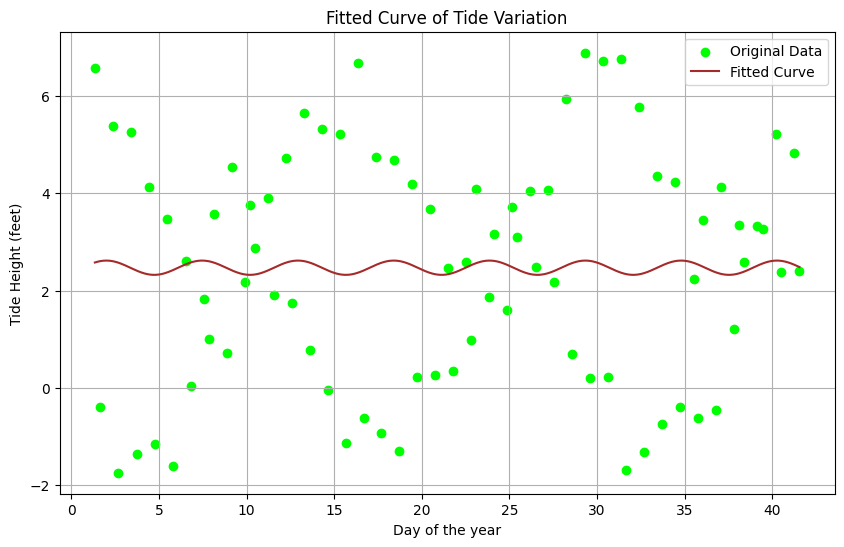

In [8]:
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = oscillatory_func(x_fit, *popt)

# Plotting the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data', color='lime')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='brown')
plt.title('Fitted Curve of Tide Variation')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (feet)')
plt.legend()
plt.grid(True)
plt.savefig('Fitted_Curve_of_Tide_Variation.pdf',bbox_inches='tight',dpi=600)
plt.show()
#plt.save will be needed, don't want to create files just yet though.

Part 3 - Shazer
subtract off the best fit function from the data and plot the residuals

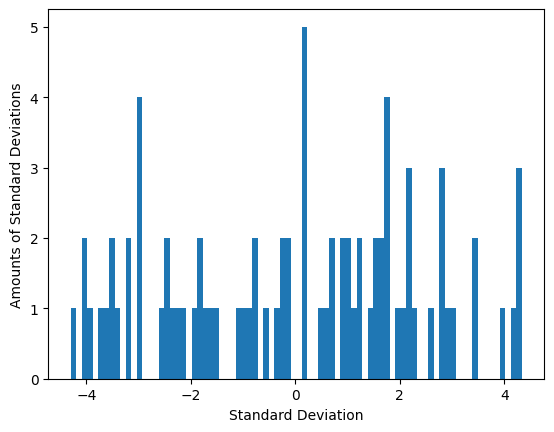

In [9]:
dataset = []  #The difference between the curve line and the dots
for i in range(len(tide_heights)):
    specific = int(i * (1000/82))
    temp = tide_heights[i] - y_fit[specific]
    dataset.append(temp)


plt.hist(dataset, bins = 82)
plt.xlabel('Standard Deviation')
plt.ylabel('Amounts of Standard Deviations')

plt.savefig('Deviation_Histogram.PDF',bbox_inches='tight',dpi=600)
plt.show()

Part 4 - Misha 
I took used dataset.append to add a 2ft outlier at the appropriate location in the data (26th datapoint), reflecting the tsunami. After that I took the standard deviation of the data set to compare how much of an outlier the tsunami made the data. Then I calculated the number of standard deviations the data point was an outlier by. Finally, I added labels, and did a thing where the amount that the tsunami was an outlier by got printed directly on the histogram. 

In [ ]:
dataset = []  #The difference between the curve line and the dots
for i in range(len(tide_heights)):
    specific = int(i * (1000/82))
    temp = tide_heights[i] - y_fit[specific]
    dataset.append(temp)

# Add the 2ft tsunami outlier to the dataset
dataset.append(2.0)

plt.figure(figsize=(8, 6))
plt.hist(dataset, bins=82)
plt.xlabel('Standard Deviation')
plt.ylabel('Amounts of Standard Deviations')
plt.title('Histogram of Tide Deviations with Tsunami Outlier')

# Calculate the standard deviation of the dataset
std_dev = np.std(dataset)

# Calculate the number of standard deviations the tsunami outlier is from the mean
tsunami_deviation = 2.0 / std_dev

# Add text to the plot indicating the tsunami deviation
plt.text(0.05, 0.95, f'Tsunami Deviation: {tsunami_deviation:.2f} std', 
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.savefig('Deviation_Histogram_with_Tsunami.pdf', dpi=600)
plt.show()